In [54]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
import warnings
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder ,StandardScaler, FunctionTransformer
from sklearn.metrics import classification_report, confusion_matrix
import pickle
warnings.filterwarnings("ignore")



In [3]:
data = pd.read_csv("/Users/rekha/Downloads/cover_type (1) (1).csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           145890 non-null  int64  
 1   Aspect                              145890 non-null  int64  
 2   Slope                               145890 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64  
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64  
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64  
 6   Hillshade_9am                       145890 non-null  int64  
 7   Hillshade_Noon                      145890 non-null  int64  
 8   Hillshade_3pm                       145890 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64  
 10  Wilderness_Area_1                   145890 non-null  float64
 11  Wilderness_Area_2         

In [5]:
data.shape

(145890, 55)

In [6]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
145885    False
145886    False
145887    False
145888    False
145889    False
Length: 145890, dtype: bool

In [7]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [8]:
data['Cover_Type'].value_counts()

Cover_Type
Lodgepole Pine       103071
Spruce/Fir            31110
Aspen                  3069
Krummholz              2160
Ponderosa Pine         2160
Douglas-fir            2160
Cottonwood/Willow      2160
Name: count, dtype: int64

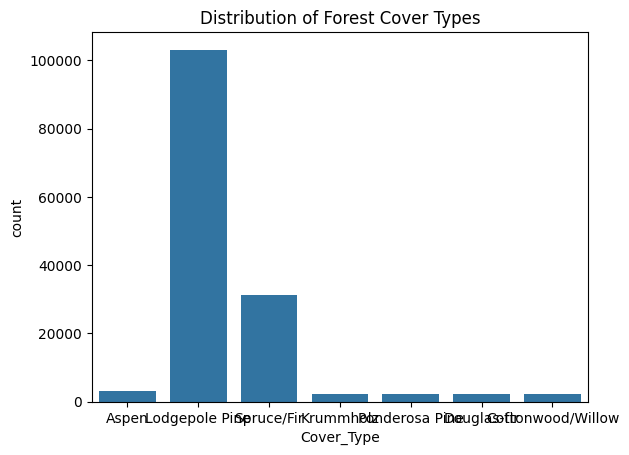

Cover_Type
Lodgepole Pine       70.649805
Spruce/Fir           21.324285
Aspen                 2.103640
Krummholz             1.480568
Ponderosa Pine        1.480568
Douglas-fir           1.480568
Cottonwood/Willow     1.480568
Name: proportion, dtype: float64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Cover_Type
sns.countplot(x='Cover_Type', data=data)
plt.title("Distribution of Forest Cover Types")
plt.show()

# Percentage of each class
print(data['Cover_Type'].value_counts(normalize=True) * 100)

In [10]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen


           Elevation         Aspect          Slope  \
count  145890.000000  145890.000000  145890.000000   
mean     2874.458949     141.127418      11.925574   
std       210.801279     107.719296       6.319326   
min      1863.000000       0.000000       0.000000   
25%      2747.000000      54.000000       7.000000   
50%      2909.000000     108.000000      11.000000   
75%      3004.000000     217.000000      15.000000   
max      3849.000000     360.000000      61.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     145890.000000                   145890.000000   
mean                         251.824738                       34.554322   
std                          192.473899                       41.215776   
min                            0.000000                     -146.000000   
25%                           95.000000                        7.000000   
50%                          212.000000                       2

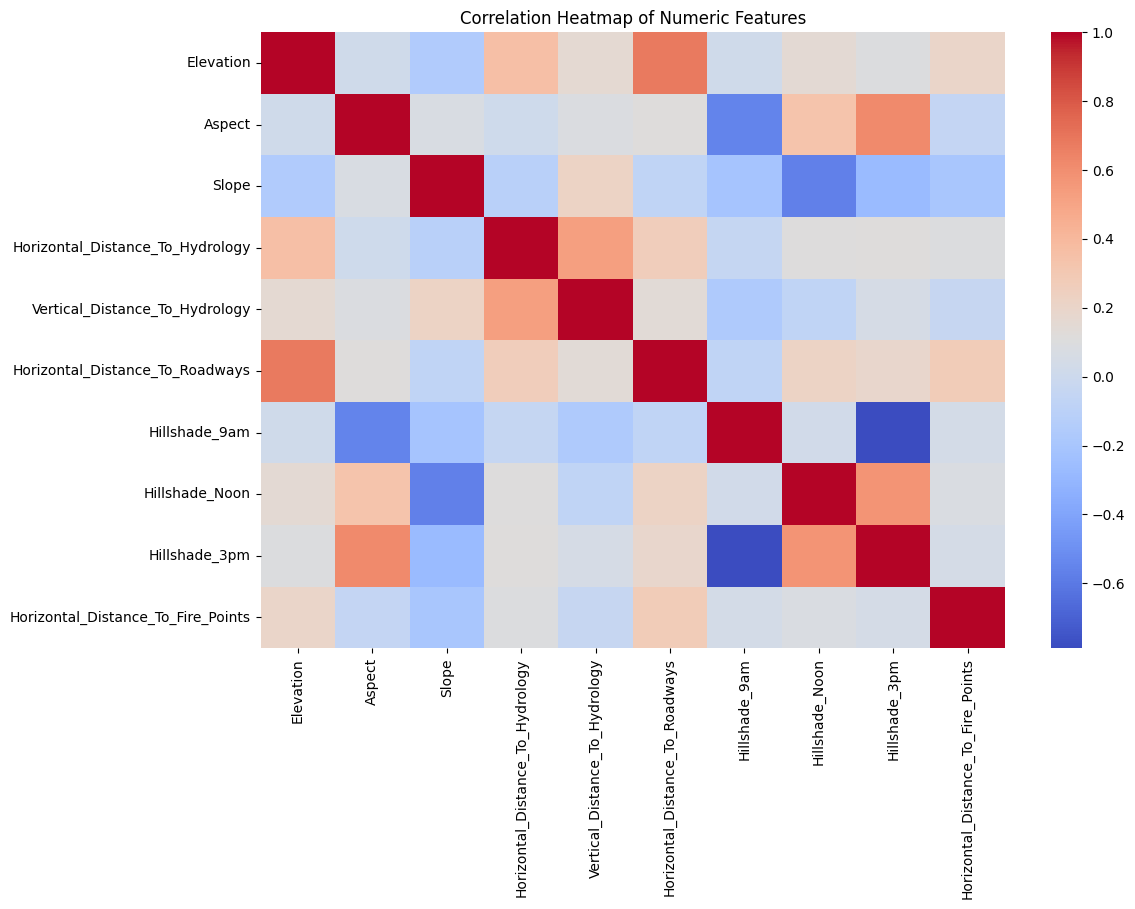

In [11]:
num_col = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

# Summary statistics
print(data[num_col].describe())

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data[num_col].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

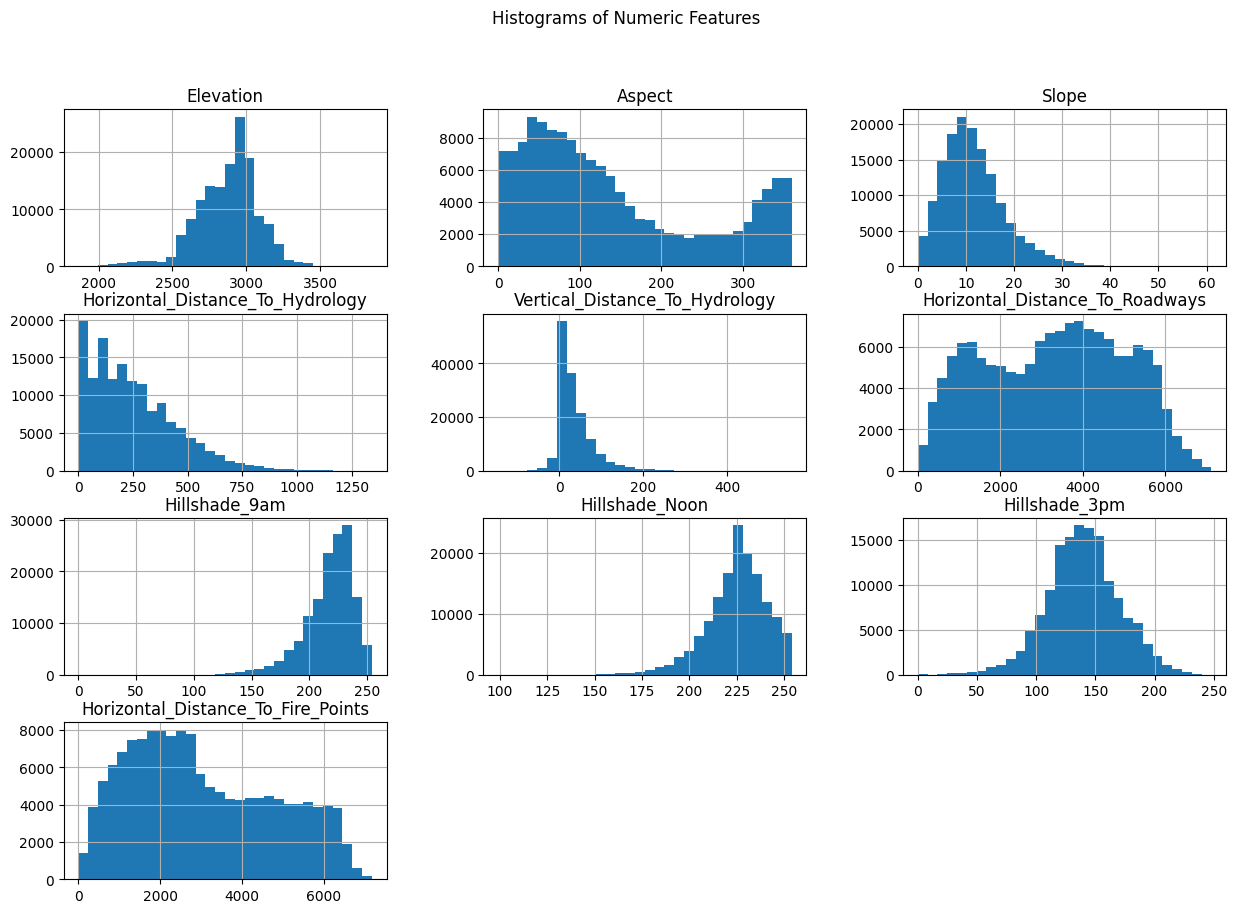

In [12]:
data[num_col].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

Wilderness_Area_1    134367.0
Wilderness_Area_2       499.0
Wilderness_Area_3      6349.0
Wilderness_Area_4      4675.0
dtype: float64
Soil_Type_1       355.0
Soil_Type_2       623.0
Soil_Type_3       962.0
Soil_Type_4       843.0
Soil_Type_5       165.0
Soil_Type_6       650.0
Soil_Type_7       105.0
Soil_Type_8       179.0
Soil_Type_9      1112.0
Soil_Type_10     2142.0
Soil_Type_11      406.0
Soil_Type_12    29144.0
Soil_Type_13      476.0
Soil_Type_14      169.0
Soil_Type_15        0.0
Soil_Type_16     2219.0
Soil_Type_17      612.0
Soil_Type_18     1829.0
Soil_Type_19     1046.0
Soil_Type_20     6098.0
Soil_Type_21       16.0
Soil_Type_22      931.0
Soil_Type_23    10150.0
Soil_Type_24     2169.0
Soil_Type_25        1.0
Soil_Type_26       54.0
Soil_Type_27       15.0
Soil_Type_28        9.0
Soil_Type_29    60696.0
Soil_Type_30    18158.0
Soil_Type_31      332.0
Soil_Type_32      690.0
Soil_Type_33      616.0
Soil_Type_34       22.0
Soil_Type_35      102.0
Soil_Type_36       10.0
S

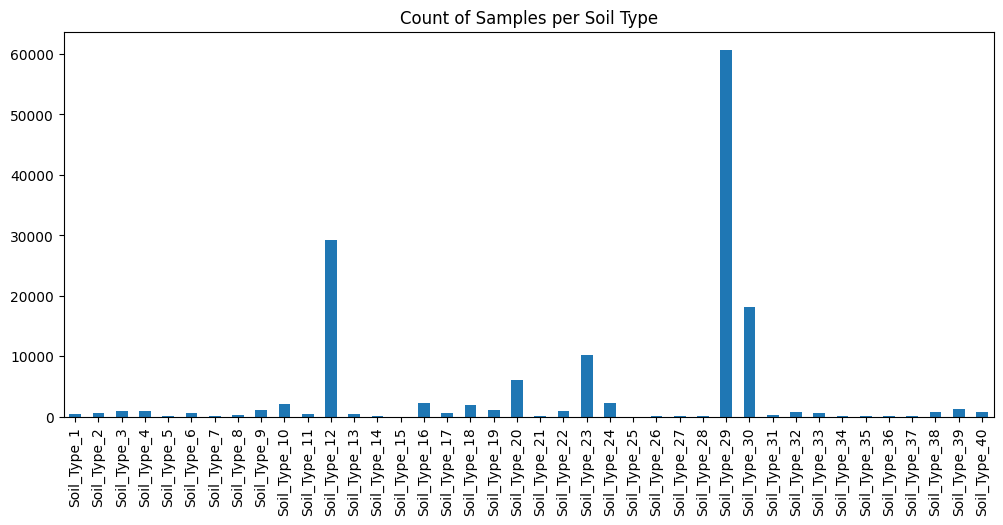

In [13]:
# Identify columns: usually one-hot encoded columns like Wilderness_Area1, Soil_Type1, etc.
wilderness_cols = [col for col in data.columns if 'Wilderness' in col]
soil_cols = [col for col in data.columns if 'Soil_Type' in col]

# Count of samples in each wilderness area
wilderness_counts = data[wilderness_cols].sum()
print(wilderness_counts)

# Count of samples in each soil type
soil_counts = data[soil_cols].sum()
print(soil_counts)

# Optional: bar plot for soil types
plt.figure(figsize=(12,5))
soil_counts.plot(kind='bar')
plt.title("Count of Samples per Soil Type")
plt.show()

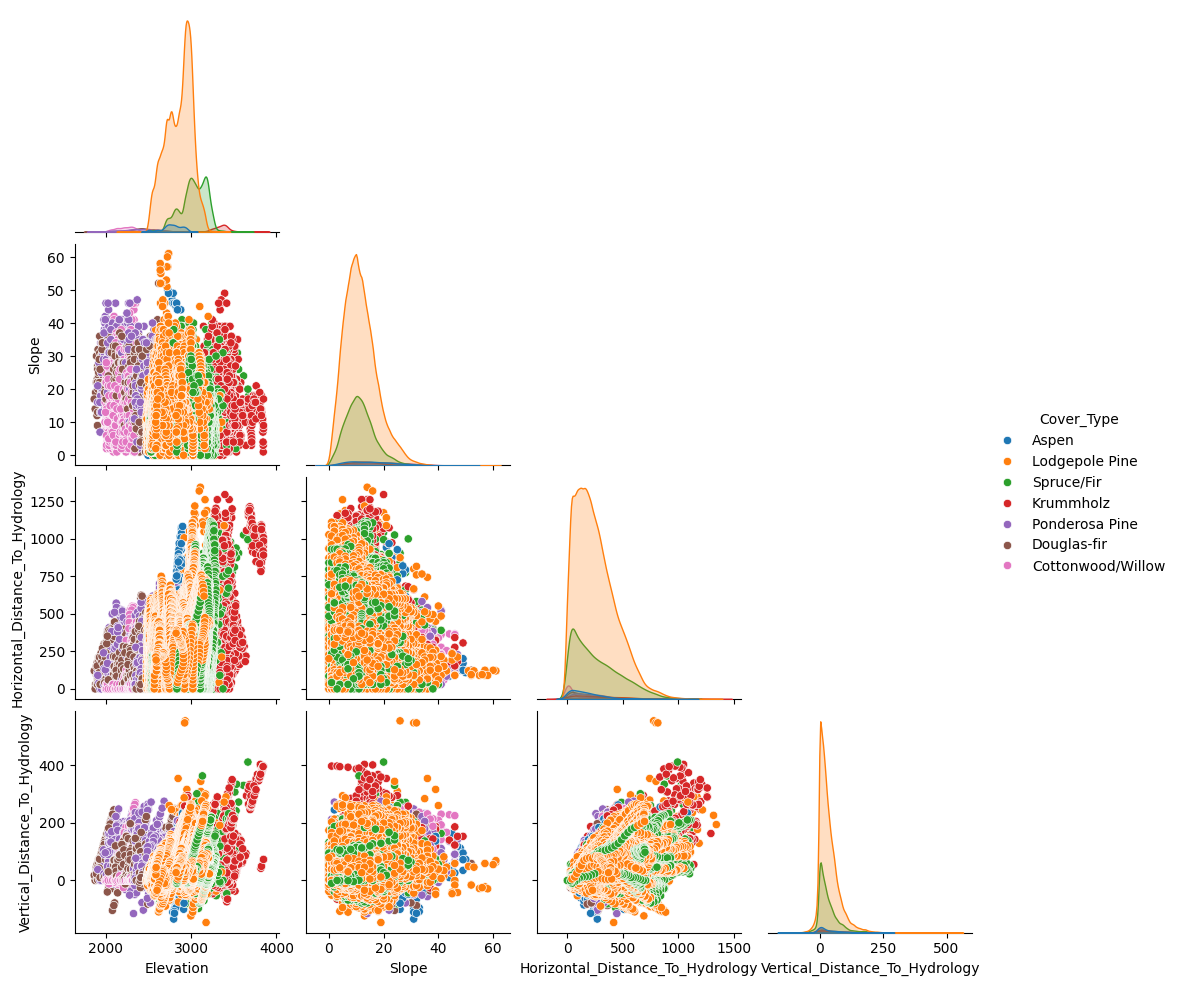

In [15]:
selected_features = ['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']
sns.pairplot(data[selected_features + ['Cover_Type']], hue='Cover_Type', corner=True)
plt.show()

## Handling outliers



In [16]:
num_col = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

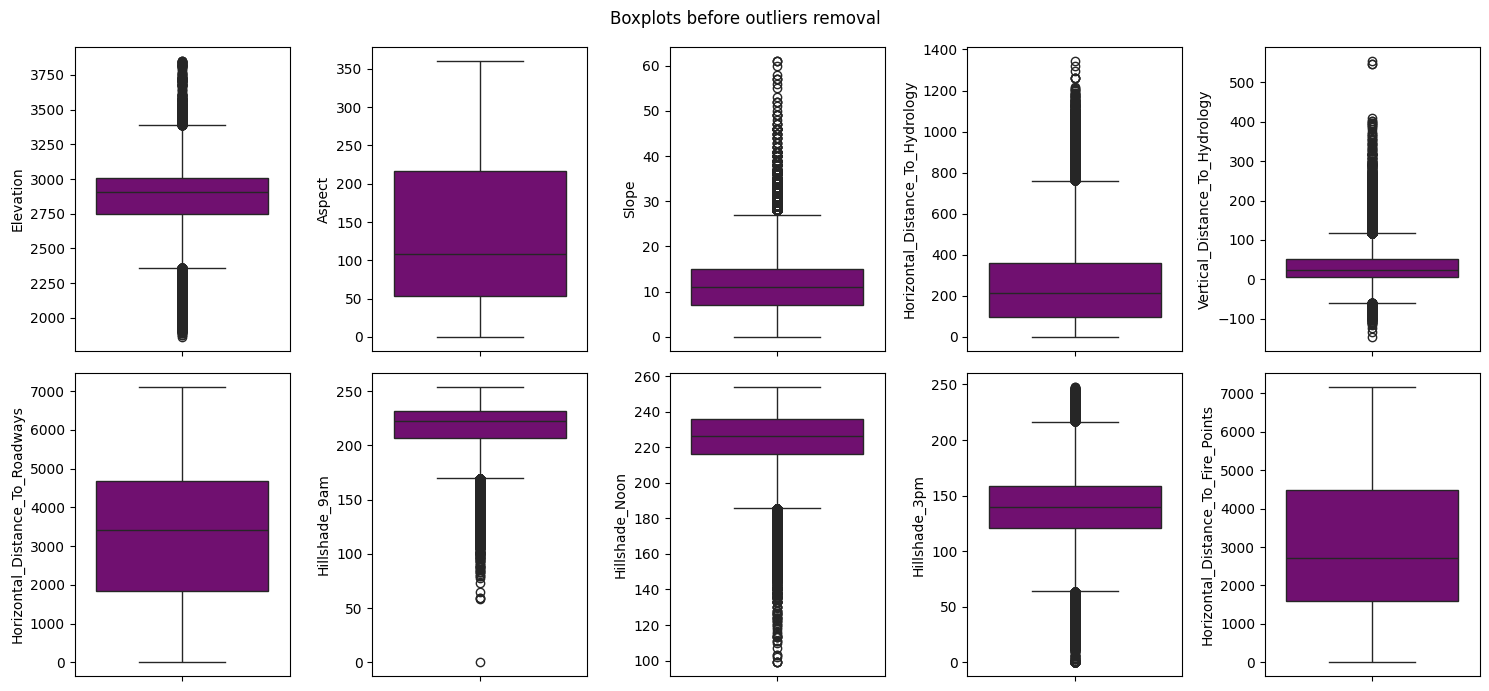

In [17]:
plt.figure(figsize=(15,7))
plt.suptitle("Boxplots before outliers removal")
for i in range(0,len(num_col)):
    plt.subplot(2, 5,i+1)
    sns.boxplot(y=data[num_col[i]],color='purple')
    plt.tight_layout()
    

## IQR

In [18]:
len(data)

145890

In [19]:
(25/100)*(145890+1)

36472.75

In [20]:
(75/100)*(145890+1)

109418.25

In [21]:
for col in num_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = np.where(data[col] < lower_bound,lower_bound,data[col])
    data[col] = np.where(data[col] > upper_bound,upper_bound,data[col])

In [22]:
data['Elevation'].quantile(0.25)

2747.0

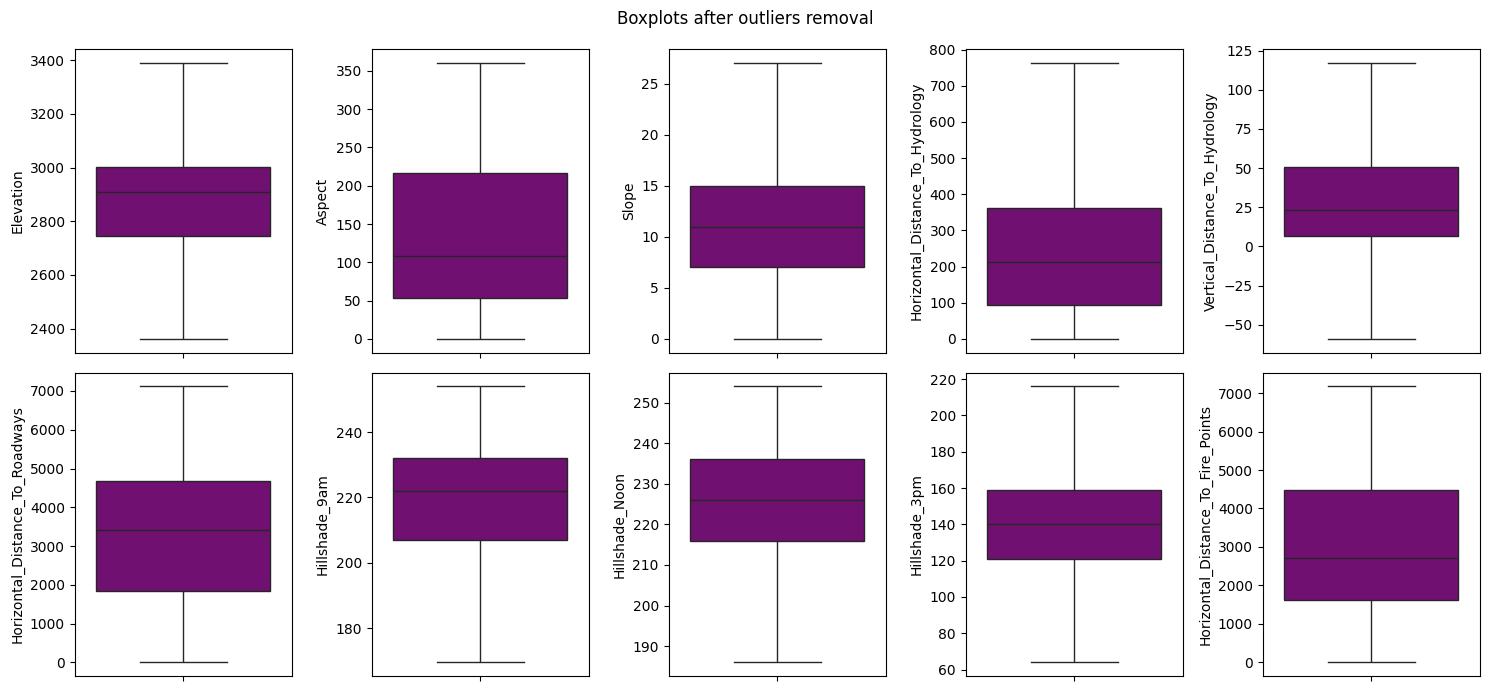

In [23]:
plt.figure(figsize=(15,7))
plt.suptitle("Boxplots after outliers removal")
for i in range(0,len(num_col)):
    plt.subplot(2, 5,i+1)
    sns.boxplot(y=data[num_col[i]],color='purple')
    plt.tight_layout()

In [25]:
data.shape

(145890, 55)

In [26]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
3,2785.0,155.0,18.0,242.0,117.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen


In [27]:
data.select_dtypes(include=['object']).columns

Index(['Cover_Type'], dtype='object')

## Encoding

In [28]:
le = LabelEncoder()
data['Cover_Type'] = le.fit_transform(data['Cover_Type'])

In [29]:
data['Cover_Type'].unique()

array([0, 4, 6, 3, 5, 2, 1])

In [30]:
with open('target.pkl', 'wb') as f:
    pickle.dump(le, f)

In [31]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,2785.0,155.0,18.0,242.0,117.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Handling Skewness

In [32]:

# Select numeric columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate skewness
skew_values = data[num_cols].skew()

In [33]:
#  handling skewness using PowerTransformer

cols_to_transform = ['Aspect', 'Slope', 
                     'Horizontal_Distance_To_Hydrology',
                     'Vertical_Distance_To_Hydrology', 
                     'Hillshade_9am']

In [34]:
data[cols_to_transform].skew()

Aspect                              0.689432
Slope                               0.621361
Horizontal_Distance_To_Hydrology    0.792349
Vertical_Distance_To_Hydrology      0.861265
Hillshade_9am                      -0.740409
dtype: float64

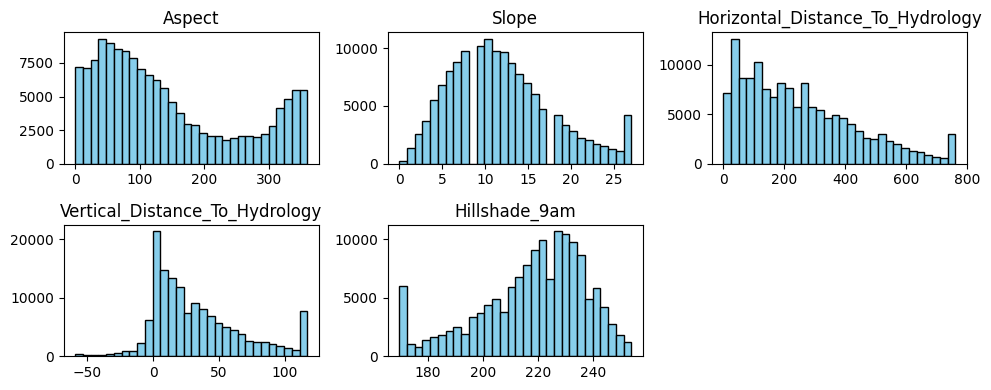

In [35]:
# visualise skewness
plt.figure(figsize=(10,4))
for i,col in enumerate(cols_to_transform,1):
    plt.subplot(2,3,i)
    plt.hist(data[col],bins=30,color='skyblue',edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

 ##  Feature selection

In [39]:
#split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


In [40]:
X = data.drop(columns=['Cover_Type'])
y = data['Cover_Type']

#Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

#Create a DataFrame
feature_importance_data =pd.DataFrame({
     'Feature':X.columns,
     'Importance':rf_model.feature_importances_
})
#Sort by importance in descending order
feature_importance_data = feature_importance_data.sort_values(by='Importance',ascending=False)

#Display  the top features
feature_importance_data

,Feature,Importance
0,Elevation,0.234040
5,Horizontal_Distance_To_Roadways,0.137538
9,Horizontal_Distance_To_Fire_Points,0.121330
3,Horizontal_Distance_To_Hydrology,0.062866
4,Vertical_Distance_To_Hydrology,0.058999
10,Wilderness_Area_1,0.048504
1,Aspect,0.047769
8,Hillshade_3pm,0.041921
7,Hillshade_Noon,0.041303
6,Hillshade_9am,0.039656


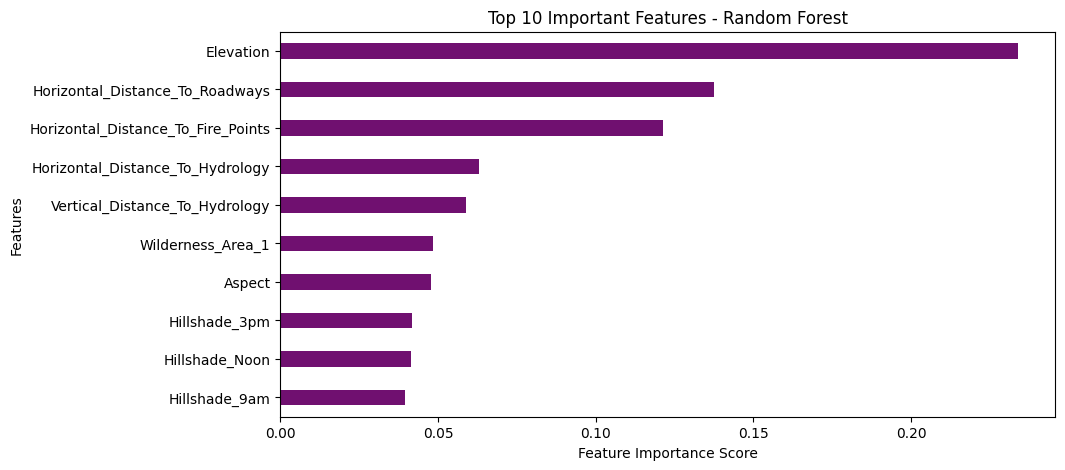

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance_data['Importance'][:10], y=feature_importance_data['Feature'][:10],color='purple', width=0.4)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features - Random Forest")
plt.show()

In [42]:
# Columns to consider
feature_importance_data['Feature'][:10].tolist()

['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Wilderness_Area_1',
 'Aspect',
 'Hillshade_3pm',
 'Hillshade_Noon',
 'Hillshade_9am']

In [43]:
data['Cover_Type'].value_counts()

Cover_Type
4    103071
6     31110
0      3069
3      2160
5      2160
2      2160
1      2160
Name: count, dtype: int64

In [44]:
st = feature_importance_data['Feature'][:20].to_list()
X_train = X_train[st]
X_test = X_test[st]

In [51]:
st

['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Wilderness_Area_1',
 'Aspect',
 'Hillshade_3pm',
 'Hillshade_Noon',
 'Hillshade_9am',
 'Slope',
 'Wilderness_Area_4',
 'Wilderness_Area_3',
 'Soil_Type_12',
 'Soil_Type_23',
 'Soil_Type_10',
 'Soil_Type_29',
 'Soil_Type_39',
 'Soil_Type_30',
 'Soil_Type_38']

## Model building

In [57]:
from imblearn.pipeline import Pipeline
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Identify numeric and categorical columns
num_cols = ['Elevation', 'Aspect', 'Slope',
            'Horizontal_Distance_To_Hydrology',
            'Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways',
            'Hillshade_9am', 'Hillshade_Noon',
            'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

cat_cols = [col for col in X_train.columns if 'Wilderness_Area' in col or 'Soil_Type' in col]
# Column-wise preprocessing
preprocessor = ColumnTransformer([
    # Power transform only specific columns
    ('power', PowerTransformer(method='yeo-johnson'), cols_to_transform),
    
    # Scale *all* numeric columns
    ('scaler', StandardScaler(), num_cols),
    
    # Leave categorical columns as-is
    ('cat', 'passthrough', cat_cols)
])


# Loop through models
for name, model in models.items():
    print(f"--- {name} ---")
    
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),  
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.11      0.78      0.19       580
           1       0.85      0.91      0.88       423
           2       0.63      0.65      0.64       440
           3       0.63      0.97      0.77       405
           4       0.89      0.65      0.75     20709
           5       0.58      0.55      0.57       402
           6       0.50      0.66      0.57      6219

    accuracy                           0.66     29178
   macro avg       0.60      0.74      0.62     29178
weighted avg       0.78      0.66      0.70     29178

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       580
           1       0.91      0.89      0.90       423
           2       0.74      0.74      0.74       440
           3       0.86      0.93      0.89       405
           4       0.97      0.95      0.96     20709
           5       0.67     

In [58]:
X_train

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Wilderness_Area_1,Aspect,Hillshade_3pm,Hillshade_Noon,Hillshade_9am,Slope,Wilderness_Area_4,Wilderness_Area_3,Soil_Type_12,Soil_Type_23,Soil_Type_10,Soil_Type_29,Soil_Type_39,Soil_Type_30,Soil_Type_38
81693,2985.0,3334.0,6258.0,175.0,20.0,1.0,31.0,140.0,222.0,218.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
97638,2825.0,2695.0,2505.0,162.0,24.0,1.0,170.0,149.0,244.0,227.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88183,3037.0,5989.0,3638.0,762.5,117.0,1.0,287.0,187.0,240.0,193.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
65889,2949.0,4455.0,5608.0,150.0,23.0,1.0,62.0,145.0,232.0,223.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40471,3157.0,4681.0,2160.0,457.0,117.0,1.0,37.0,118.0,204.0,218.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,3182.0,2992.0,4336.0,362.0,40.0,1.0,70.0,109.0,214.0,234.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
119879,3033.0,5385.0,660.0,361.0,82.0,1.0,90.0,130.0,229.0,231.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
103694,3165.0,3055.0,4773.0,484.0,23.0,1.0,63.0,146.0,233.0,222.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
131932,3065.0,4725.0,624.0,124.0,19.0,1.0,348.0,159.0,202.0,177.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


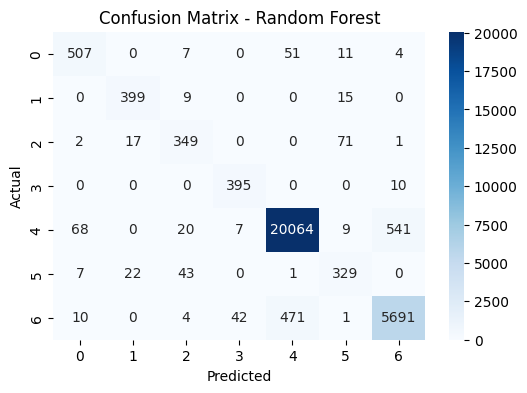

In [59]:
 # Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Cross Validation

In [159]:
#Cross Validation

for name, model in models.items():
    print(f"--- {name} ---")
    
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),  
        ('model', model)
    ])
# Stratified K-Fold cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Evaluate accuracy across folds
    scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='accuracy')
    
    print("Cross-Validation Accuracy Scores:", scores)
    print("Mean Accuracy:", np.mean(scores))
    print("Standard Deviation:", np.std(scores))

--- Logistic Regression ---
Cross-Validation Accuracy Scores: [0.65034486 0.64978794 0.65786993 0.65769857 0.65846971]
Mean Accuracy: 0.6548342033004702
Standard Deviation: 0.00390528161486684
--- Decision Tree ---
Cross-Validation Accuracy Scores: [0.92408859 0.9250739  0.92194328 0.92652729 0.92044384]
Mean Accuracy: 0.9236153786094607
Standard Deviation: 0.002176467059489448
--- K-Nearest Neighbors ---
Cross-Validation Accuracy Scores: [0.86239986 0.86150024 0.86247965 0.86530717 0.86217976]
Mean Accuracy: 0.8627733364741793
Standard Deviation: 0.0013129486845522688
--- Random Forest ---
Cross-Validation Accuracy Scores: [0.9450799  0.94422311 0.9448205  0.94533459 0.94272127]
Mean Accuracy: 0.9444358726501324
Standard Deviation: 0.000933328137639938


## Hyperparameter 


--- Decision Tree ---
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best CV Macro F1 Score: 0.7770901432472029
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       614
           1       0.90      0.88      0.89       432
           2       0.61      0.68      0.64       432
           3       0.88      0.92      0.90       432
           4       0.97      0.94      0.95     20614
           5       0.58      0.70      0.63       432
           6       0.86      0.89      0.88      6222

    accuracy                           0.92     29178
   macro avg       0.78      0.84      0.81     29178
weighted avg       0.92      0.92      0.92     29178



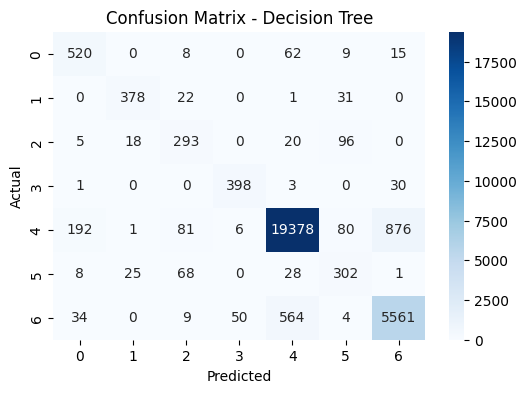


--- Random Forest ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best CV Macro F1 Score: 0.8308819001149974
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       614
           1       0.93      0.91      0.92       432
           2       0.72      0.73      0.72       432
           3       0.87      0.97      0.91       432
           4       0.96      0.97      0.96     20614
           5       0.73      0.78      0.75       432
           6       0.91      0.87      0.89      6222

    accuracy                           0.94     29178
   macro avg       0.85      0.87      0.86     29178
weighted avg       0.94      0.94      0.94     29178



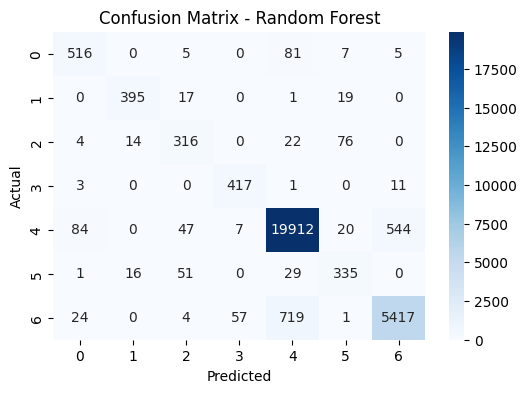

In [100]:


# Define models and hyperparameter grids
models_params = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "model__max_depth": [10, 20, 30, None],
            "model__min_samples_split": [2, 5, 10],
            "model__min_samples_leaf": [1, 2, 4]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, n_jobs=-1),
        "params": {
            "model__n_estimators": [100, 200],
            "model__max_depth": [10, 20, None],
            "model__min_samples_split": [2, 5],
            "model__min_samples_leaf": [1, 2]
        }
    }
}


# Pipeline with SMOTE
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier())
])

# Stratified K-Fold CV
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # 3 folds for speed

# GridSearchCV
grid = GridSearchCV(pipeline, mp["params"], cv=skf, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Macro F1 Score:", grid.best_score_)

# Evaluate on test set
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest is the better model — it gives higher F1, accuracy, and more robust generalization.


In [60]:
from sklearn.ensemble import RandomForestClassifier

# Train the final model using best hyperparameters
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
final = Pipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)), 
        ('model', RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42)
)])
pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('power', ...), ('scaler', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [63]:
from sklearn.metrics import classification_report, accuracy_score

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

print("Final Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Final Model Accuracy: 0.948934128452944

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       580
           1       0.90      0.97      0.94       423
           2       0.83      0.83      0.83       440
           3       0.89      0.97      0.93       405
           4       0.96      0.98      0.97     20709
           5       0.80      0.78      0.79       402
           6       0.95      0.86      0.90      6219

    accuracy                           0.95     29178
   macro avg       0.89      0.88      0.89     29178
weighted avg       0.95      0.95      0.95     29178



In [ ]:
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(final, f)